In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


**OBJECTIVE:** To analyze **Customer Churn**, extract **Business Insights**, and provide **Actionable Recommendations** that companies can use to **Reduce Churn** and **Improve Retention**.

#  Loading Our Data

In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Missing Values in Data

In [3]:
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Thankfully our data has no missing values, we should also check for the info of the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


One thing that stands out from df.info() is that "TotalCharges" is stored as an object (string) instead of a numerical type. Since this column represents customer spending, it should be a numeric data type for proper analysis.

# Understanding Our Churn Distribution

let's analyze the distribution of our target variable, **"Churn"**

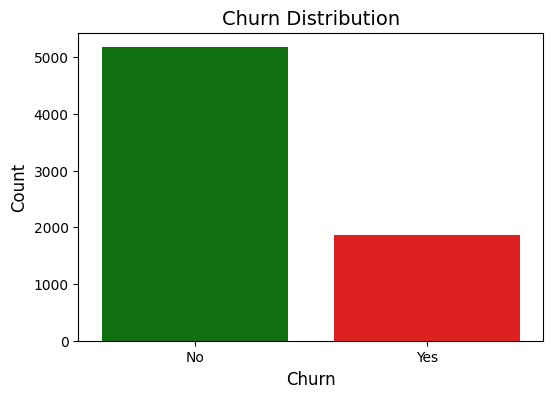

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df["Churn"].value_counts()

# Plotting to visualize the churn distribution
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["Green", "red"])
plt.title("Churn Distribution", fontsize=14)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

print(churn_counts)

This means around **26.5%** of customers have churned, while **73.5%** stayed

# Exploring Churn Patterns

Now that we know the churn distribution, let’s analyze how churn relates to key factors like:

* **Gender & Churn** – Does gender impact churn?

* **Senior Citizen & Churn** – Do older customers churn more?

* **Contract Type & Churn** – Do long-term contracts reduce churn?

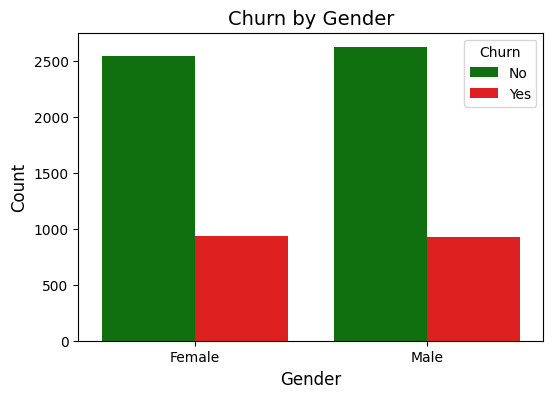

In [6]:
# Plotting to visualize the churn by gender
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=df, palette=["Green", "red"])
plt.title("Churn by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

### Key Takeaway:

* Gender does NOT seem to be a significant factor in churn.
* The churn rates for both males and females appear similar.

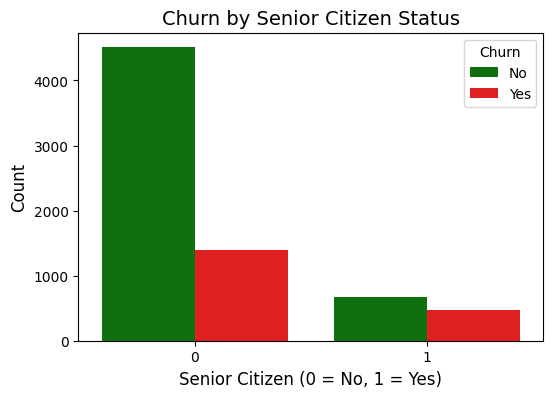

   SeniorCitizen Churn  Count
0              0    No   4508
1              0   Yes   1393
2              1    No    666
3              1   Yes    476


In [7]:
# Plotting to visualize the churn by Senior Citizen Status
plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, palette=["green", "red"])
plt.title("Churn by Senior Citizen Status", fontsize=14)
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

senior_churn_counts = df.groupby(['SeniorCitizen', 'Churn'])['customerID'].count().reset_index()
senior_churn_counts.rename(columns={'customerID': 'Count'}, inplace=True)
print(senior_churn_counts)

### Key Takeaway:

* Senior Citizens have a higher churn rate compared to non-seniors.

* 476 out of 1142 Senior Citizens (41.7%) have churned, whereas only 1393 out of 5901 non-senior customers (23.6%) have churned.

* This suggests that older customers are at a higher risk of leaving and may require special retention strategies.

# Impact of Partner and Dependents Columns on Churn

* Customers with families may have different service needs and spending habits.

* If single customers churn more, we might need to target them with special retention offers.

  Partner Dependents Churn  Count
0      No         No    No   2157
1      No         No   Yes   1123
2      No        Yes    No    284
3      No        Yes   Yes     77
4     Yes         No    No   1233
5     Yes         No   Yes    420
6     Yes        Yes    No   1500
7     Yes        Yes   Yes    249


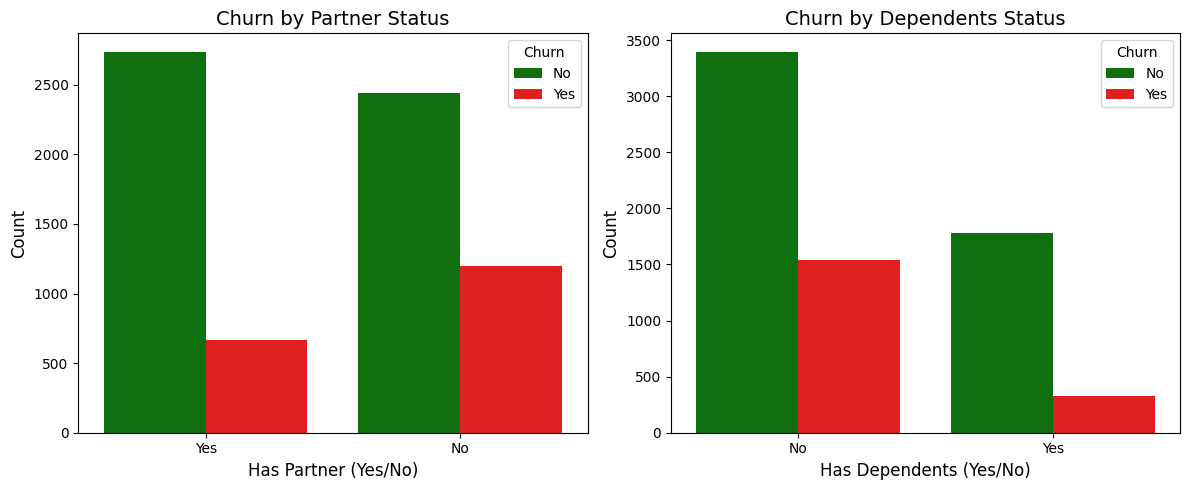

In [8]:
# Counting values before plotting
partner_dependents_counts = df.groupby(['Partner', 'Dependents', 'Churn'])['customerID'].count().reset_index()
partner_dependents_counts.rename(columns={'customerID': 'Count'}, inplace=True)
print(partner_dependents_counts)

# Plotting visuals with Partner and Dependents
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Partner vs. Churn
sns.countplot(x="Partner", hue="Churn", data=df, palette=["green", "red"], ax=axes[0])
axes[0].set_title("Churn by Partner Status", fontsize=14)
axes[0].set_xlabel("Has Partner (Yes/No)", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(title="Churn", labels=["No", "Yes"])

# Dependents vs. Churn
sns.countplot(x="Dependents", hue="Churn", data=df, palette=["green", "red"], ax=axes[1])
axes[1].set_title("Churn by Dependents Status", fontsize=14)
axes[1].set_xlabel("Has Dependents (Yes/No)", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(title="Churn", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

### Insights from Partner & Dependents Impact on Churn

* Customers with No Partner and No Dependents → 1123 churned out of 3280 (~34.2% churn rate). This is the highest churn rate among all groups. These customers might be less tied to the service and more likely to switch.

* Customers with a Partner and Dependents → 249 churned out of 1749 (~14.2% churn rate). This is the lowest churn rate. Possibly because customers with families rely more on stable service and long-term contracts.

### Business Implications:


**Single customers without dependents churn the most.**

  Action: Telco should create loyalty discounts, flexible plans, or targeted retention offers for them.

**Customers with families are more loyal.**

  Action: Encourage family plans and bundled services to retain them long-term.

# Impact of Tenure on Churn

Since tenure is currently in months, we’ll convert it into years for better readability and insights.

In [9]:
# Turning tenure into tenure years
df['tenure_years'] = (df['tenure'] / 12).round(1)  # Convert months to years and round to 1 decimal place

# Defining bins and labels
bins = [0, 1, 2, 3, 4, 5, 6, float("inf")]
labels = ["0-1 year", "1-2 years", "2-3 years", "3-4 years", "4-5 years", "5-6 years", "6+ years"]

# Creating a grouped tenure column
df["tenure_group"] = pd.cut(df["tenure_years"], bins=bins, labels=labels, right=False)

tenure_group_counts = df.groupby(["tenure_group", "Churn"])["customerID"].count().reset_index()
tenure_group_counts.rename(columns={"customerID": "Count"}, inplace=True)

print(tenure_group_counts)

   tenure_group Churn  Count
0      0-1 year    No   1070
1      0-1 year   Yes    999
2     1-2 years    No    738
3     1-2 years   Yes    309
4     2-3 years    No    683
5     2-3 years   Yes    193
6     3-4 years    No    602
7     3-4 years   Yes    146
8     4-5 years    No    697
9     4-5 years   Yes    123
10    5-6 years    No   1028
11    5-6 years   Yes     93
12     6+ years    No    356
13     6+ years   Yes      6


<ipython-input-9-3ae5d0a3be10>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_group_counts = df.groupby(["tenure_group", "Churn"])["customerID"].count().reset_index()


In [10]:
# Defining bins and labels
bins = [0, 1, 2, 3, 4, 5, 6, float("inf")]
labels = ["0-1 year", "1-2 years", "2-3 years", "3-4 years", "4-5 years", "5-6 years", "6+ years"]

# Creating a grouped tenure column
df["tenure_group"] = pd.cut(df["tenure_years"], bins=bins, labels=labels, right=False)

tenure_group_counts = df.groupby(["tenure_group", "Churn"])["customerID"].count().reset_index()
tenure_group_counts.rename(columns={"customerID": "Count"}, inplace=True)

print(tenure_group_counts)

   tenure_group Churn  Count
0      0-1 year    No   1070
1      0-1 year   Yes    999
2     1-2 years    No    738
3     1-2 years   Yes    309
4     2-3 years    No    683
5     2-3 years   Yes    193
6     3-4 years    No    602
7     3-4 years   Yes    146
8     4-5 years    No    697
9     4-5 years   Yes    123
10    5-6 years    No   1028
11    5-6 years   Yes     93
12     6+ years    No    356
13     6+ years   Yes      6


<ipython-input-10-80bc5100ec60>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_group_counts = df.groupby(["tenure_group", "Churn"])["customerID"].count().reset_index()


Since tenure is currently in months, we’ll convert it into years for better readability and insights.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


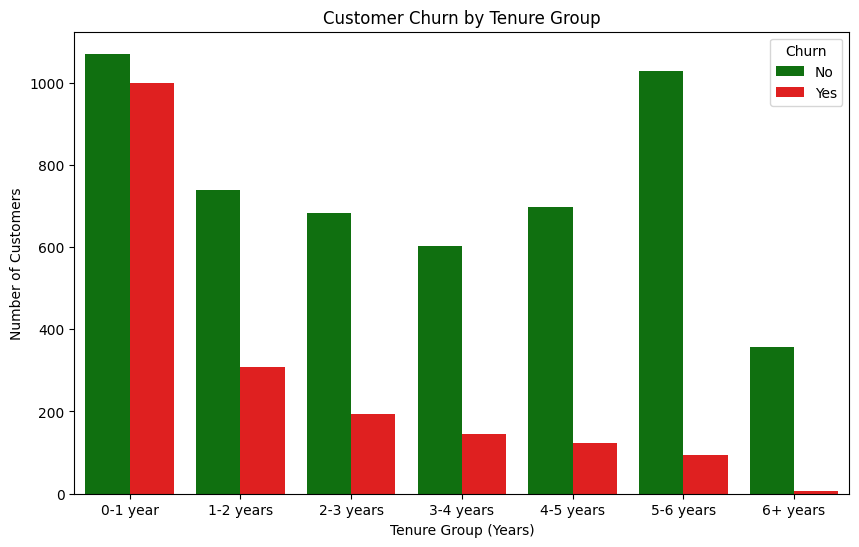

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x="tenure_group", y="Count", hue="Churn", data=tenure_group_counts, palette=["green", "red"])
plt.xlabel("Tenure Group (Years)")
plt.ylabel("Number of Customers")
plt.title("Customer Churn by Tenure Group")
plt.legend(title="Churn")

plt.show()

### Observations & Insights




* High churn in the 0-1 year group(nearly 48%)

* Potential business action: Improve onboarding, customer support, or early engagement strategies.

* Churn drops significantly after the first year(around 29%)

* Potential business action: Implement retention strategies during the first year.

* Churn is almost negligible after 5+ years

* Long-term customers tend to stay very loyal.

# Analyzing Contract Type & Churn

One key factor affecting churn is contract type. Customers with monthly contracts might leave more easily than those on long-term contracts (1- or 2-year plans).

In [12]:
# Counting churned vs non-churned customers by contract type
contract_churn_counts = df.groupby(['Contract', 'Churn'])['customerID'].count().reset_index()
contract_churn_counts.rename(columns={'customerID': 'Count'}, inplace=True)
print(contract_churn_counts)

         Contract Churn  Count
0  Month-to-month    No   2220
1  Month-to-month   Yes   1655
2        One year    No   1307
3        One year   Yes    166
4        Two year    No   1647
5        Two year   Yes     48


* **Month-to-month** contracts have the highest churn rate – 1,655 customers left, which is significantly higher than other contract types.

* **One-year & two-year** contracts have much lower churn rates – Customers on longer contracts are less likely to leave.

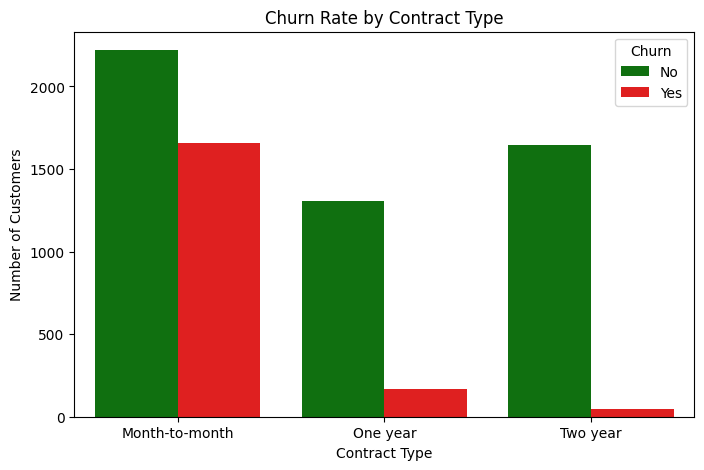

In [13]:
# Plotting contract type vs. churn
plt.figure(figsize=(8, 5))
sns.barplot(x='Contract', y='Count', hue='Churn', data=contract_churn_counts, palette=["green", "red"])

plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.title("Churn Rate by Contract Type")
plt.legend(title="Churn")
plt.show()

# Analyzing Payment Methods vs. Churn

In [14]:
# Grouping by Payment Method and Churn
payment_churn_counts = df.groupby(['PaymentMethod', 'Churn'])['customerID'].count().reset_index()
payment_churn_counts.rename(columns={'customerID': 'Count'}, inplace=True)
print(payment_churn_counts)

               PaymentMethod Churn  Count
0  Bank transfer (automatic)    No   1286
1  Bank transfer (automatic)   Yes    258
2    Credit card (automatic)    No   1290
3    Credit card (automatic)   Yes    232
4           Electronic check    No   1294
5           Electronic check   Yes   1071
6               Mailed check    No   1304
7               Mailed check   Yes    308


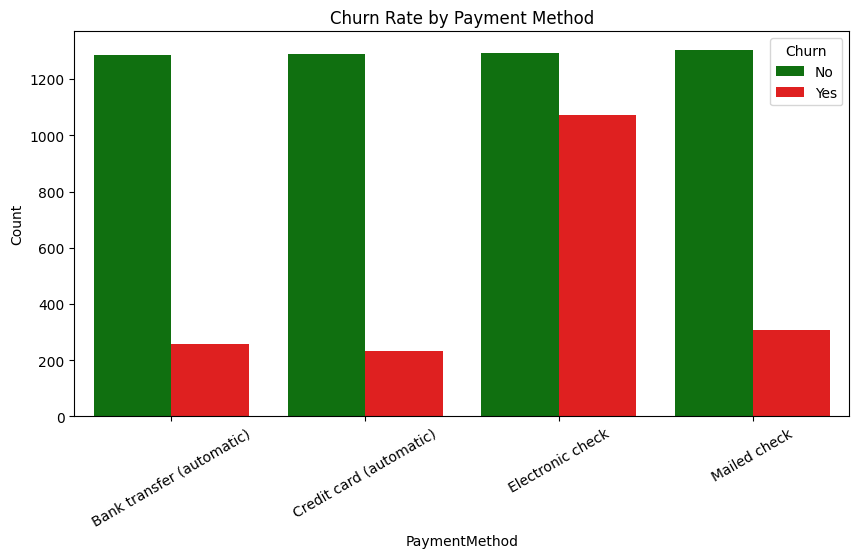

In [15]:
# Visualizing Payment Method vs Churn
plt.figure(figsize=(10, 5))
sns.barplot(x="PaymentMethod", y="Count", hue="Churn", data=payment_churn_counts, palette=["green", "red"])
plt.xticks(rotation=30)  # Rotating x-labels for better readability
plt.title("Churn Rate by Payment Method")
plt.show()

### Why Do Electronic Check Users Churn More?

* Customers using electronic checks have to manually make payments each time. This makes it easier for them to miss payments, forget, or decide to stop using the service.

* People using electronic checks might be less financially stable than those who set up automatic payments through a bank or credit card.

* Automatic payments provide a frictionless experience. Manually making payments every month can be a hassle, leading to churn.

### Why Do Credit Card & Bank Transfer Users Churn Less?

* Set-and-Forget Convenience: Once automatic payments are set up, users are less likely to cancel.
  
* Higher Financial Stability: Customers who use bank transfers or credit cards are usually more stable financially.

* Psychological Inertia: People are less likely to cancel a subscription that charges automatically.
  

### Business Takeaway:

* Encourage auto-payment signups with discounts or benefits.

# Churn vs. Monthly Charges

In [16]:
monthly_charges_churn_counts = df.groupby(['Churn'])['MonthlyCharges'].describe()[['count', 'mean', 'min', '25%', '50%', '75%', 'max']]
print(monthly_charges_churn_counts)

        count       mean    min    25%     50%   75%     max
Churn                                                       
No     5174.0  61.265124  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  18.85  56.15  79.650  94.2  118.35


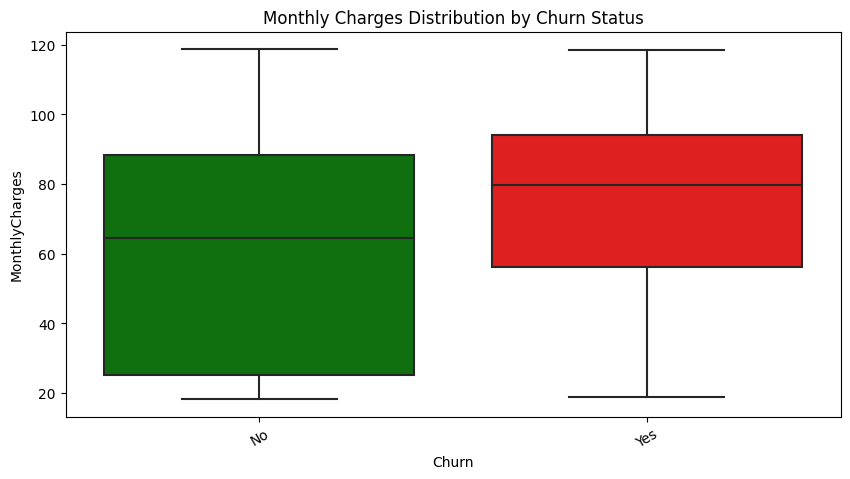

In [17]:
# Visualizing Monthly Charges vs Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette=["green", "red"])
plt.xticks(rotation=30)
plt.title("Monthly Charges Distribution by Churn Status")
plt.show()

Customers who didn’t churn (No):

* Average Monthly Charge: $61.27

Customers who churned (Yes):

* Average Monthly Charge: $74.44 (Higher than non-churners)


### Smart Business Decision:

* Improve perceived value for premium plans – Customers may feel they’re not getting enough value for what they pay, leading them to leave.

# More Detailed Analysis

In [18]:
df['MonthlyChargesGroup'] = pd.cut(df['MonthlyCharges'], bins=[0, 30, 60, 90, 120], labels=['0-30', '30-60', '60-90', '90-120'])
monthly_charges_churn_counts = df.groupby(['MonthlyChargesGroup', 'Churn'])['customerID'].count().reset_index()
monthly_charges_churn_counts.rename(columns={'customerID': 'Count'}, inplace=True)
print(monthly_charges_churn_counts)

  MonthlyChargesGroup Churn  Count
0                0-30    No   1491
1                0-30   Yes    162
2               30-60    No    937
3               30-60   Yes    328
4               60-90    No   1577
5               60-90   Yes    809
6              90-120    No   1169
7              90-120   Yes    570


<ipython-input-18-adb2a4e64962>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_charges_churn_counts = df.groupby(['MonthlyChargesGroup', 'Churn'])['customerID'].count().reset_index()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


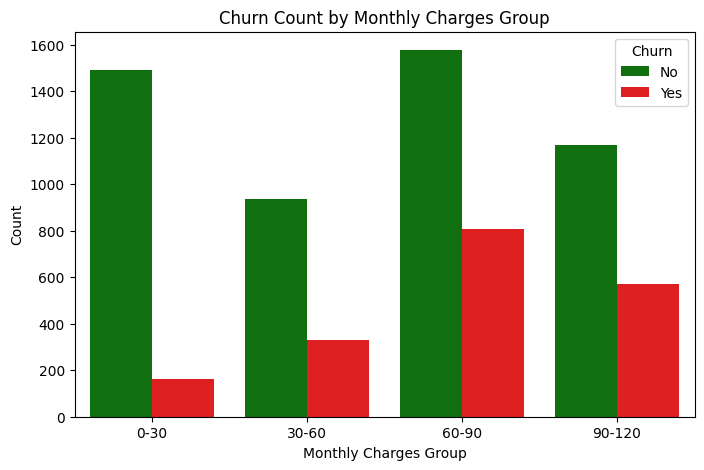

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='MonthlyChargesGroup', y='Count', hue='Churn', data=monthly_charges_churn_counts, palette=["green","red"])
plt.title("Churn Count by Monthly Charges Group")
plt.xlabel("Monthly Charges Group")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [20]:
# List of service columns
service_columns = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Converting 'Yes'/'No' to numerical values (1/0)
df_services = df[service_columns].replace({'Yes': 1, 'No': 0, 'Fiber optic': 1, 'DSL': 1, 'No internet service': 0})

# Counting number of services per customer
df['NumServices'] = df_services.sum(axis=1)

# Grouping by number of services and churn
service_churn_counts = df.groupby(['NumServices', 'Churn'])['customerID'].count().reset_index()
service_churn_counts.rename(columns={'customerID': 'Count'}, inplace=True)
print(service_churn_counts)

    NumServices Churn  Count
0             1    No   1458
1             1   Yes    148
2             2    No    352
3             2   Yes    375
4             3    No    563
5             3   Yes    433
6             4    No    680
7             4   Yes    361
8             5    No    773
9             5   Yes    289
10            6    No    645
11            6   Yes    182
12            7    No    459
13            7   Yes     66
14            8    No    244
15            8   Yes     15


<ipython-input-20-5fabc815cc1a>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_services = df[service_columns].replace({'Yes': 1, 'No': 0, 'Fiber optic': 1, 'DSL': 1, 'No internet service': 0})


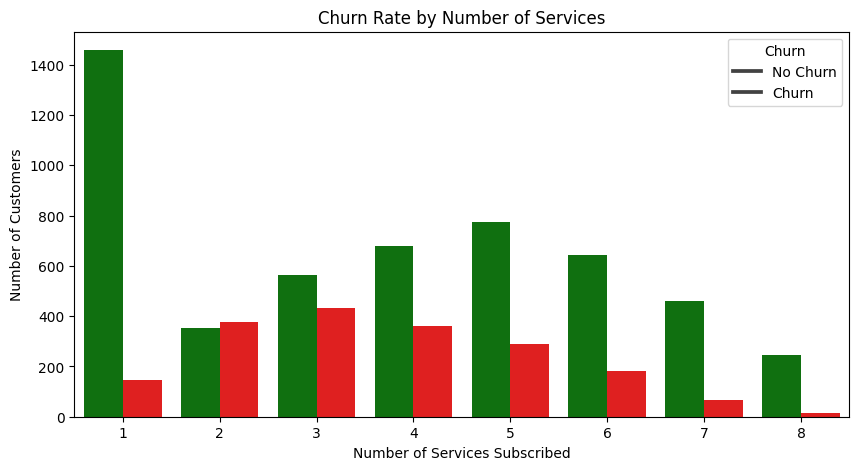

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(data=service_churn_counts, x='NumServices', y='Count', hue='Churn', palette=['green', 'red'])
plt.xlabel('Number of Services Subscribed')
plt.ylabel('Number of Customers')
plt.title('Churn Rate by Number of Services')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=0)
plt.show()

# Correlations

In [22]:
df.dtypes

customerID               object
gender                   object
SeniorCitizen             int64
Partner                  object
Dependents               object
tenure                    int64
PhoneService             object
MultipleLines            object
InternetService          object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
Contract                 object
PaperlessBilling         object
PaymentMethod            object
MonthlyCharges          float64
TotalCharges             object
Churn                    object
tenure_years            float64
tenure_group           category
MonthlyChargesGroup    category
NumServices               int64
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

# Converting 'TotalCharges' to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Label Encoding Binary Categorical Columns (Yes/No, Male/Female)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-Hot Encoding Multi-Category Columns
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies', 'Contract',
                                 'PaymentMethod'], drop_first=True)

In [24]:
print(df.dtypes)

customerID                                 object
gender                                      int64
SeniorCitizen                               int64
Partner                                     int64
Dependents                                  int64
tenure                                      int64
PhoneService                                int64
PaperlessBilling                            int64
MonthlyCharges                            float64
TotalCharges                              float64
Churn                                       int64
tenure_years                              float64
tenure_group                             category
MonthlyChargesGroup                      category
NumServices                                 int64
MultipleLines_No phone service               bool
MultipleLines_Yes                            bool
InternetService_Fiber optic                  bool
InternetService_No                           bool
OnlineSecurity_No internet service           bool


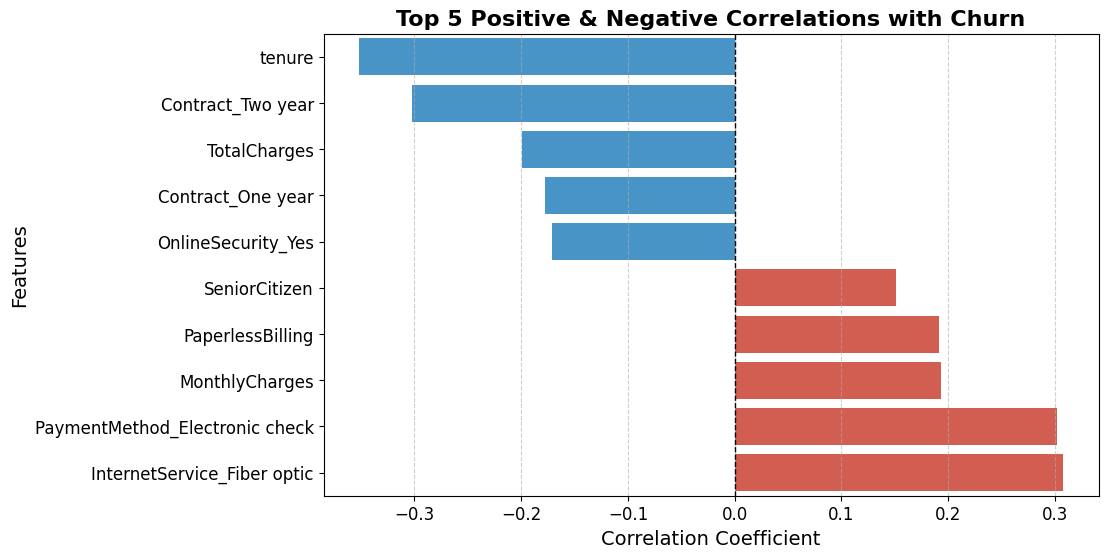

In [25]:
# Dropping unnecessary columns
drop_cols = [
    "customerID", "tenure_group", "MonthlyChargesGroup", "tenure_years",
    "InternetService_No", "StreamingMovies_No internet service", "StreamingTV_No internet service",
    "TechSupport_No internet service", "DeviceProtection_No internet service",
    "OnlineBackup_No internet service", "OnlineSecurity_No internet service",
    "MultipleLines_No phone service", "gender"
]

df_cleaned = df.drop(columns=drop_cols, axis=1)
churn_corr = df_cleaned.corr()["Churn"].drop(index="Churn").dropna().sort_values()

# Selecting top 5 positive & negative correlations
top_pos = churn_corr.tail(5)
top_neg = churn_corr.head(5)
top_features = pd.concat([top_neg, top_pos])

# Defining colors: warm for positive, cool for negative
colors = ["#3498DB" if x < 0 else "#E74C3C" for x in top_features]

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=top_features.index, x=top_features.values, palette=colors)

# Title and labels
plt.title("Top 5 Positive & Negative Correlations with Churn", fontsize=16, fontweight='bold')
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Grid and aesthetics
plt.axvline(0, color="black", linestyle="--", linewidth=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

# Key Insights from Correlation Analysis

### Features Negatively Correlated with Churn (Customers Staying Longer)

A negative correlation means that as these values increase, churn decreases (i.e., customers are more likely to stay).

* Tenure (-0.352) → Customers who have been with the company longer are less likely to churn.

* Contract (Two-Year) (-0.302) → Having a two-year contract strongly reduces churn, as customers with longer contracts are more committed.

* Total Charges (-0.199) → Higher total payments over time suggest a long-term customer relationship, lowering churn.

* Contract (One-Year) (-0.178) → Even a one-year contract decreases churn, though not as strongly as a two-year contract.

* Online Security (Yes) (-0.171) → Customers who subscribe to online security services are less likely to leave, suggesting that added security services improve retention.

Takeaway: Customers on long-term contracts, with higher total payments, and additional security services are less likely to churn.

### Features Positively Correlated with Churn (Customers More Likely to Leave)


A positive correlation means that as these values increase, churn increases (i.e., customers are more likely to leave).

* Internet Service: Fiber Optic (0.308) → Customers with fiber optic internet tend to churn more. This could be due to higher costs or service dissatisfaction.

* Payment Method: Electronic Check (0.302) → Customers paying via electronic check have a high churn rate, possibly indicating higher financial instability or dissatisfaction.

* Monthly Charges (0.193) → Higher monthly charges are linked to a higher churn rate. This suggests price sensitivity among customers.

* Paperless Billing (0.192) → Customers opting for paperless billing churn more often. This could indicate a preference for digital transactions, often associated with price-conscious or tech-savvy users willing to switch providers.

* Senior Citizen (0.151) → Older customers tend to churn more. This could be due to affordability concerns, changing needs, or lack of engagement with digital services.

 Takeaway: Customers with higher monthly bills, digital payment methods, fiber optic internet, and older demographics tend to leave more often.


###  Business Implications & Actionable Steps
* Reduce Churn by Encouraging Long-Term Commitments → Offer incentives (discounts, benefits) for longer contract durations to retain customers.
* Enhance Value for High-Monthly-Paying Customers → Provide better customer support, additional perks, or exclusive discounts to high-paying customers.
* Improve Customer Experience for Fiber Optic Users → Investigate why fiber optic users are leaving (e.g., service issues, price sensitivity).
* Monitor Electronic Check Users → Offer alternative payment plans or discounts to prevent financial churn risks.
* Engage Senior Customers More Effectively → Provide better support, simplified billing, and retention strategies to improve engagement.

### Final Thought 
This analysis provides critical insights into churn behavior, helping us develop targeted retention strategies. By addressing the pain points of high-churn customers and reinforcing factors that drive loyalty, we can improve customer retention and reduce churn effectively

# Enhanced EDA (Correlation Heatmap & Churn Distributions)

Churn by One-Year Contract:
Churn                 0     1
Contract_One year            
False              3867  1703
True               1307   166 



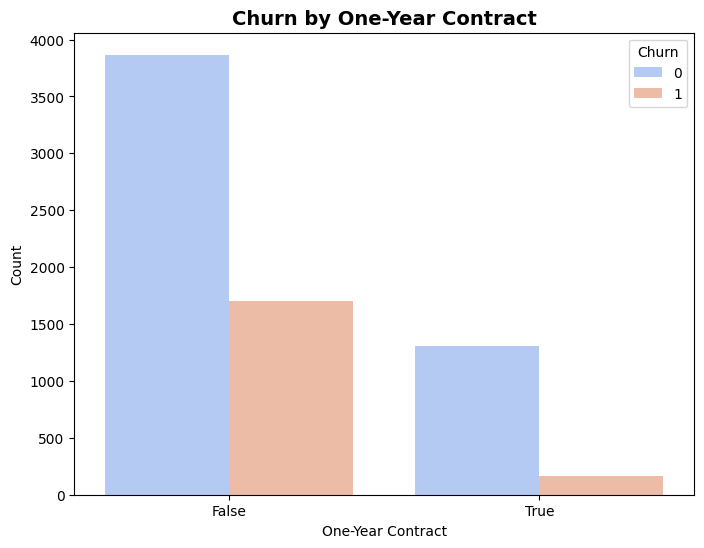

Churn by Two-Year Contract:
Churn                 0     1
Contract_Two year            
False              3527  1821
True               1647    48 



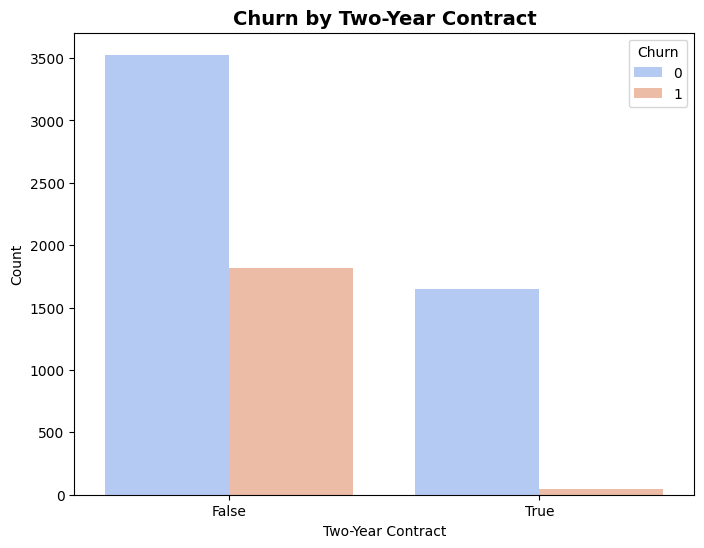

Monthly Charges Summary by Churn:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
0      5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35 



<ipython-input-26-7936569321b0>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Churn"] == 0]["MonthlyCharges"], shade=True, label="Not Churned", color="blue")
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-26-7936569321b0>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Churn"] == 1]["MonthlyCharges"], shade=True, label="Churned", color="red")
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version.

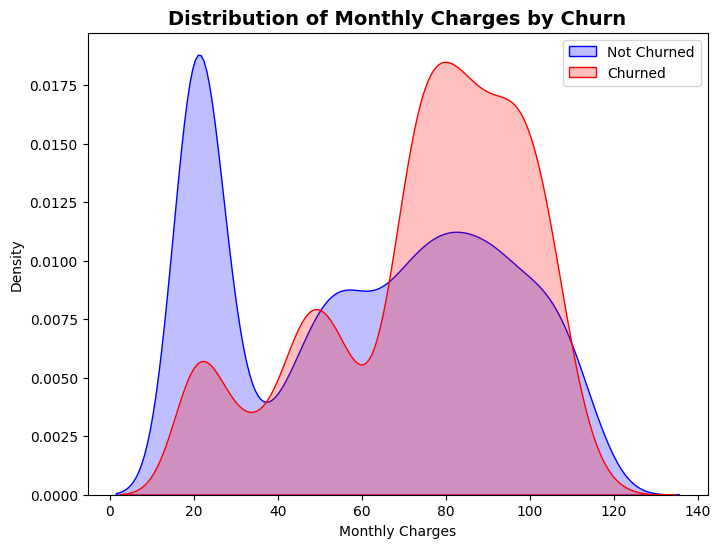

Top correlations with Churn:
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
MonthlyCharges                    0.193356
PaperlessBilling                  0.191825
SeniorCitizen                     0.150889
StreamingTV_Yes                   0.063228
StreamingMovies_Yes               0.061382
MultipleLines_Yes                 0.040102
PhoneService                      0.011942
NumServices                      -0.030765
Name: Churn, dtype: float64 



/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


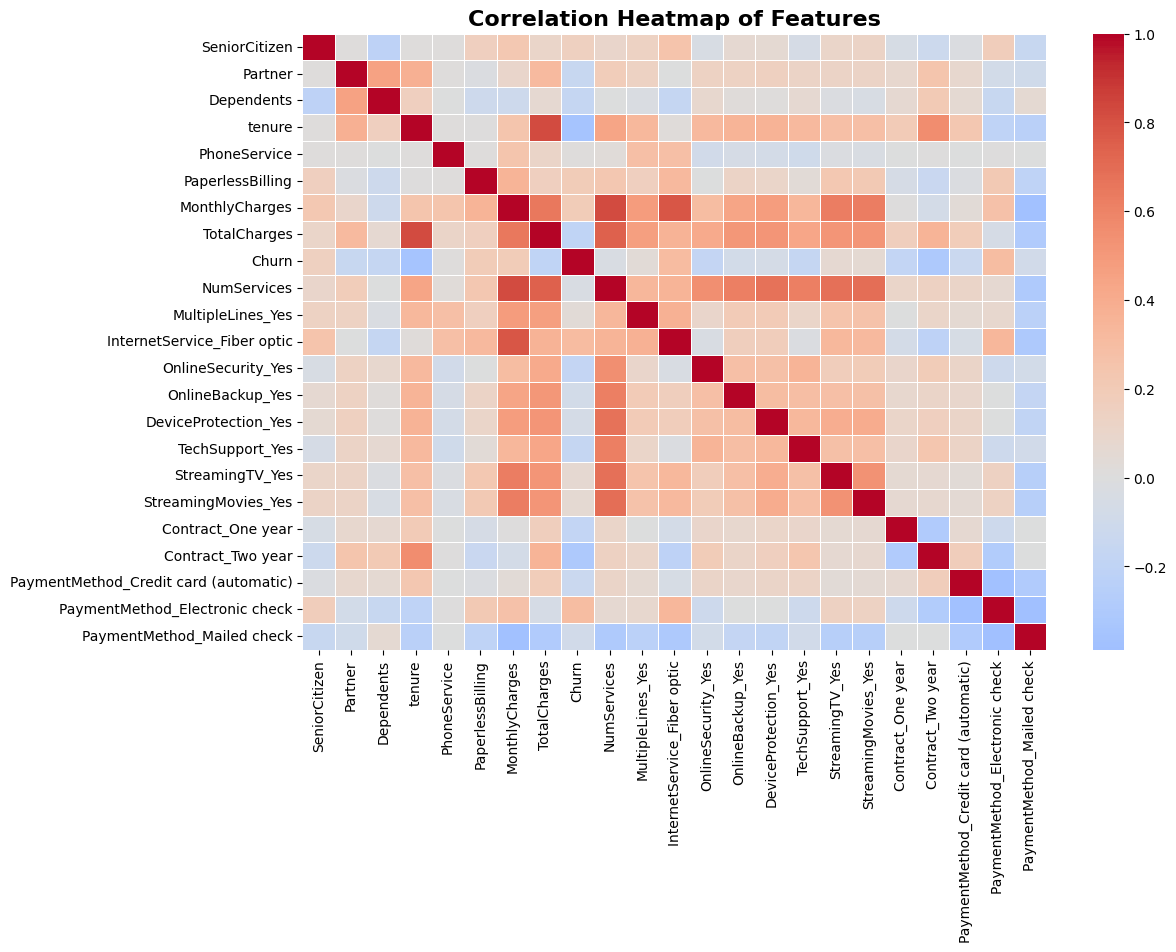

In [26]:
# Print churn counts for One-Year contract
print("Churn by One-Year Contract:")
print(df[["Contract_One year", "Churn"]].value_counts().unstack().fillna(0), "\n")

# Visualize it
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Contract_One year", hue="Churn", palette="coolwarm")
plt.title("Churn by One-Year Contract", fontsize=14, fontweight="bold")
plt.xlabel("One-Year Contract")
plt.ylabel("Count")
plt.show()

# Print churn counts for Two-Year contract
print("Churn by Two-Year Contract:")
print(df[["Contract_Two year", "Churn"]].value_counts().unstack().fillna(0), "\n")

# Visualize it
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Contract_Two year", hue="Churn", palette="coolwarm")
plt.title("Churn by Two-Year Contract", fontsize=14, fontweight="bold")
plt.xlabel("Two-Year Contract")
plt.ylabel("Count")
plt.show()

# Print summary statistics grouped by Churn
print("Monthly Charges Summary by Churn:")
print(df.groupby("Churn")["MonthlyCharges"].describe(), "\n")

# KDE Plot for Monthly Charges
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df["Churn"] == 0]["MonthlyCharges"], shade=True, label="Not Churned", color="blue")
sns.kdeplot(df[df["Churn"] == 1]["MonthlyCharges"], shade=True, label="Churned", color="red")
plt.title("Distribution of Monthly Charges by Churn", fontsize=14, fontweight="bold")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend()
plt.show()

# Print top correlations (if you want to display raw numbers before heatmap)
print("Top correlations with Churn:")
print(df_cleaned.corr()["Churn"].drop("Churn").sort_values(ascending=False).head(10), "\n")

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16, fontweight="bold")
plt.show()



### Contract Type Drives Retention

**Customers on One-Year Contracts:**

Low churn: Only 11% churn rate (166 out of 1473)

**Customers on Two-Year Contracts:**

Very low churn: Just 2.8% churn rate (48 out of 1695)

**Customers with No Long-Term Contract:**

Significantly higher churn observed


**Action: Promote 1- and 2-year contract plans to improve customer retention.**

### High Monthly Charges = High Churn Risk

**Churned Customers pay more:**

Avg. Monthly Charge: 74.44 - 61.26 (non-churned)

Distribution skewed toward the higher range for churned users

**Action: Revisit pricing strategy — consider discounts or better value bundling for high-spending users.**

### Top 5 Features Positively Linked to Churn

Feature	- Correlation

InternetService_Fiber optic - 	0.308

PaymentMethod_Electronic check -	0.302

MonthlyCharges -	0.193

PaperlessBilling -  	0.192

SeniorCitizen - 	0.151

**Action: Focus retention campaigns on:**

* Fiber optic users
* Electronic check payers
* Senior citizens and paperless billing customers

### Strategic Recommendations:

* Encourage longer-term contracts through targeted promotions

* Identify and engage high-risk customer segments early

* Optimize pricing for better affordability and perceived value

* Provide better support for senior citizens and digital-only billers

### We completed our task and can pause this project for now.